#AI Lab 4 By Mohsin Ali Mirza k200353 BCS-6E

#Task 1

<ipython-input-17-341fe5b767da>:39: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G1, prog="twopi")


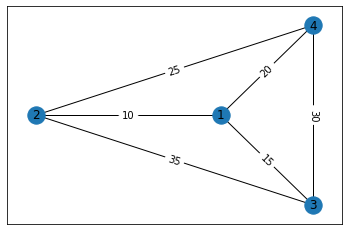

Shortest Path is: (1, 2, 4, 3)  And Shortest Distance is: 65


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from queue import PriorityQueue
from sys import maxsize
import itertools

def tsp(graph,startNode):
    # Generate all possible permutations of the nodes
    nodes = list(graph.nodes())
    nodes.remove(startNode)
    permutations = itertools.permutations(nodes)

    # Find the shortest TSP path among all permutations
    shortest_path = None
    shortest_distance = float('inf')
    for path in permutations:
        path = (startNode,) + path
        distance = 0
        for i in range(len(path)-1):
            distance += graph[path[i]][path[i+1]]['weight']
        if distance < shortest_distance:
            shortest_path = path
            shortest_distance = distance

    return shortest_path, shortest_distance

G1 = nx.Graph()
G1.add_edge(1,4, weight=20)
G1.add_edge(1,2, weight=10)
G1.add_edge(1,3, weight=15)
G1.add_edge(4,2, weight=25)
G1.add_edge(4,3, weight=30)
G1.add_edge(2,3, weight=35)


#Draw The Graph with Nodes + Weights
pos = graphviz_layout(G1, prog="twopi")
nx.draw_networkx(G1, pos)
edge_labels = nx.get_edge_attributes(G1, 'weight')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
plt.show()

shortest_path, shortestDistance = tsp(G1,1)
print("Shortest Path is:",shortest_path," And Shortest Distance is:", shortestDistance)


#Task 2

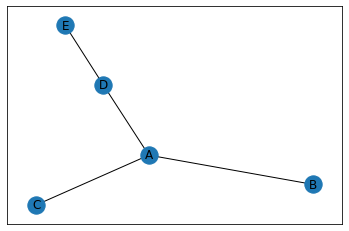

Result: A -> D -> E -> C -> B


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(startNode,G):
  visited = set()
  path = []
  stack = [startNode]

  while stack:
    curr_vertex = stack.pop()

    if(curr_vertex not in visited):
      visited.add(curr_vertex)
      path.append(curr_vertex)

      for neighbour in G.neighbors(curr_vertex):
        if neighbour not in visited:
          stack.append(neighbour)

  return path

G = nx.Graph()

G.add_edge('A','B')
G.add_edge('A','C')
G.add_edge('A','D')
G.add_edge('D','E')

nx.draw_networkx(G)
plt.show()
path = dfs('A',G)
print("Result: " + " -> ".join(path))

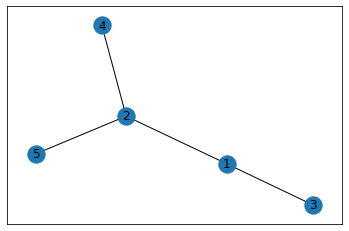


Inorder traversal of binary tree is
4
2
5
1
3


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key


# A function to do inorder tree traversal
def printInorder(root):

    if root:

        # First recur on left child
        printInorder(root.left)

        # then print the data of node
        print(root.val),

        # now recur on right child
        printInorder(root.right)

G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(2,5)

nx.draw_networkx(G)
plt.show()

# Driver code
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

print ("\nInorder traversal of binary tree is")
printInorder(root)

#Task 3 8 Puzzle Problem

In [ ]:
from queue import Queue

# Board size and goal state
N = 3
goal = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

# Class to represent board state
class BoardState:
    def __init__(self, board, moves):
        self.board = board
        self.moves = moves

    def __eq__(self, other):
        return self.board == other.board

    def __hash__(self):
        return hash(str(self.board))

    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.board])

# Function to find possible moves
def possible_moves(board):
    moves = []
    row, col = next((i, j) for i, row in enumerate(board) for j, val in enumerate(row) if val == 0)
    if row > 0: moves.append((row-1, col)) # Up
    if row < N-1: moves.append((row+1, col)) # Down
    if col > 0: moves.append((row, col-1)) # Left
    if col < N-1: moves.append((row, col+1)) # Right
    return moves

# Function to perform move and create new board state
def perform_move(board, move):
    moves, cols = len(board), len(board[0])
    row, col = move
    row0, col0 = next((i, row.index(0)) for i, row in enumerate(board) if 0 in row)
    new_board = [row[:] for row in board]
    new_board[row][col], new_board[row0][col0] = new_board[row0][col0], new_board[row][col]
    return BoardState(new_board, moves+1)

# BFS algorithm to find solution
def bfs(initial_state):
    queue = Queue()
    queue.put(initial_state)
    visited = set()
    while not queue.empty():
        current_state = queue.get()
        if current_state.board == goal:
            return current_state
        for move in possible_moves(current_state.board):
            new_state = perform_move(current_state.board, move)
            if new_state not in visited:
                queue.put(new_state)
                visited.add(new_state)
    return None

# Example usage
initial_board = [[1, 2, 3], [4, 0, 5], [7, 8, 6]]
initial_state = BoardState(initial_board, 0)
solution = bfs(initial_state)
if solution is not None:
    print("Solution found in", solution.moves, "moves:")
    print(solution)
else:
    print("No solution found.")


Solution found in 4 moves:
1 2 3
4 5 6
7 8 0


# Task 4     Bi Directional Search

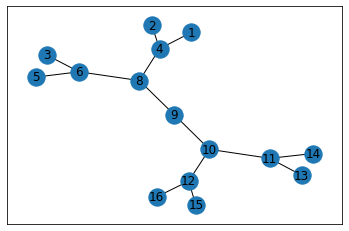

X: 9
Forward Path: ['1', '4', '1', '2', '8'] Backward Path:  ['16', '12', '10', '15']
Result: 1 -> 16 -> 4 -> 12 -> 1 -> 10 -> 2 -> 15 -> 8 -> 9


In [ ]:
from threading import currentThread
import networkx as nx
import matplotlib.pyplot as plt
from queue import Queue

def bi(G2,startNode,endNode):
  forward_queue = Queue()
  backward_queue = Queue()
  forward_visited = set()
  backward_visited = set()
  path = []
  forward_path = []
  backward_path = []


  forward_queue.put(startNode)
  backward_queue.put(endNode)
  while not forward_queue.empty() and not backward_queue.empty():
    current = forward_queue.get()
    forward_path.append(current)
    path.append(current)

    for neighbors in G2.neighbors(current):
      if(neighbors not in forward_visited):
        forward_visited.add(neighbors)
        forward_queue.put(neighbors)

      if neighbors in backward_visited:
        path.append(neighbors)
        print("X:",neighbors)
        print("Forward Path:",forward_path,"Backward Path: ",backward_path)
        return path

    current = backward_queue.get()
    backward_path.append(current)
    path.append(current)

    for neighbors in G2.neighbors(current):
      if(neighbors not in backward_visited):
        backward_visited.add(neighbors)
        backward_queue.put(neighbors)

        if neighbors in forward_visited:
          print("Forward Path:",forward_path,"Backward Path: ",backward_path)
          path.append(neighbors)
          return path


  return path



G2 = nx.Graph()

G2.add_edge('1','4')
G2.add_edge('2','4')
G2.add_edge('8','4')
G2.add_edge('8','9')
G2.add_edge('9','10')
G2.add_edge('8','6')
G2.add_edge('6','3')
G2.add_edge('6','5')
G2.add_edge('10','11')
G2.add_edge('11','13')
G2.add_edge('11','14')
G2.add_edge('10','12')
G2.add_edge('12','15')
G2.add_edge('12','16')

nx.draw_networkx(G2)
plt.show()

path = bi(G2,'1','16')
print("Result: " + " -> ".join(path))